In [7]:
# CELL 1 - imports and load the CSV
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Make plots display bigger in the notebook
plt.rcParams['figure.figsize'] = (8,5)

# Load dataset (make sure movies.csv is in the same folder)
df = pd.read_csv("movies.csv")

# Show the first few rows and basic info
print("First 5 rows:")
display(df.head())
print("\nInfo:")
display(df.info())
print("\nMissing values per column:")
display(df.isna().sum())


First 5 rows:


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"\nAction, Horror, Thriller",6.1,\nA woman with a mysterious illness is forced ...,\n Director:\nPeter Thorwarth\n| \n Star...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"\nAnimation, Action, Adventure",5.0,\nThe war for Eternia begins again in what may...,"\n \n Stars:\nChris Wood, \nSara...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"\nDrama, Horror, Thriller",8.2,\nSheriff Deputy Rick Grimes wakes up from a c...,"\n \n Stars:\nAndrew Lincoln, \n...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"\nAnimation, Adventure, Comedy",9.2,\nAn animated series that follows the exploits...,"\n \n Stars:\nJustin Roiland, \n...","414,849",23.0,NaN
4,Army of Thieves,(2021),"\nAction, Crime, Horror",NaN,"\nA prequel, set before the events of Army of ...",\n Director:\nMatthias Schweighöfer\n| \n ...,NaN,NaN,NaN



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MOVIES    9999 non-null   object 
 1   YEAR      9355 non-null   object 
 2   GENRE     9919 non-null   object 
 3   RATING    8179 non-null   float64
 4   ONE-LINE  9999 non-null   object 
 5   STARS     9999 non-null   object 
 6   VOTES     8179 non-null   object 
 7   RunTime   7041 non-null   float64
 8   Gross     460 non-null    object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


None


Missing values per column:


MOVIES         0
YEAR         644
GENRE         80
RATING      1820
ONE-LINE       0
STARS          0
VOTES       1820
RunTime     2958
Gross       9539
dtype: int64

In [8]:
# CELL 2 - remove duplicates and clean simple text issues
print("Initial shape:", df.shape)
# Remove exact duplicates
dupes = df.duplicated().sum()
print(f"Duplicates found: {dupes}")
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

# Clean newline characters and strip spaces in text columns
text_cols = ['MOVIES', 'GENRE', 'ONE-LINE', 'STARS']
for col in text_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.replace('\n', ' ', regex=True).str.strip()

# Show a small sample after cleaning
display(df.head())


Initial shape: (9999, 9)
Duplicates found: 431
Shape after dropping duplicates: (9568, 9)


,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross
0,Blood Red Sky,(2021),"Action, Horror, Thriller",6.1,A woman with a mysterious illness is forced in...,Director: Peter Thorwarth | Stars: Peri B...,"21,062",121.0,NaN
1,Masters of the Universe: Revelation,(2021– ),"Animation, Action, Adventure",5.0,The war for Eternia begins again in what may b...,"Stars: Chris Wood, Sarah Michelle Gellar, Le...","17,870",25.0,NaN
2,The Walking Dead,(2010–2022),"Drama, Horror, Thriller",8.2,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars: Andrew Lincoln, Norman Reedus, Meliss...","885,805",44.0,NaN
3,Rick and Morty,(2013– ),"Animation, Adventure, Comedy",9.2,An animated series that follows the exploits o...,"Stars: Justin Roiland, Chris Parnell, Spence...","414,849",23.0,NaN
4,Army of Thieves,(2021),"Action, Crime, Horror",NaN,"A prequel, set before the events of Army of th...",Director: Matthias Schweighöfer | Stars: ...,NaN,NaN,NaN


In [9]:
# CELL 3 - extract year number (4-digit) from YEAR column
if 'YEAR' in df.columns:
    df['YEAR'] = df['YEAR'].astype(str).str.extract(r'(\d{4})')  # get 4-digit year
    df['YEAR'] = pd.to_numeric(df['YEAR'], errors='coerce')

print("YEAR column unique sample:")
display(df['YEAR'].dropna().unique()[:10])


YEAR column unique sample:


array([2021., 2010., 2013., 2020., 2006., 2019., 2016., 2011., 2005.,
       2008.])

In [10]:
# CELL 4 - convert VOTES and Gross to numeric
if 'VOTES' in df.columns:
    df['VOTES'] = df['VOTES'].astype(str).str.replace(',', '', regex=True)
    df['VOTES'] = pd.to_numeric(df['VOTES'], errors='coerce')

if 'Gross' in df.columns:
    # Remove currency symbols and commas; if empty make 0
    df['Gross'] = df['Gross'].astype(str).str.replace('[^0-9.]', '', regex=True)
    df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce').fillna(0)

display(df[['VOTES','Gross']].head())


,VOTES,Gross
0,21062.0,0.0
1,17870.0,0.0
2,885805.0,0.0
3,414849.0,0.0
4,NaN,0.0


In [11]:
# CELL 5 - handle missing values: numeric columns -> median, categorical -> mode
numeric_cols = ['RATING', 'VOTES', 'RunTime', 'Gross']
for col in numeric_cols:
    if col in df.columns:
        med = df[col].median()
        df[col] = df[col].fillna(med)
        print(f"Filled missing {col} with median = {med}")

# For GENRE fill with mode if missing
if 'GENRE' in df.columns:
    mode_genre = df['GENRE'].mode()[0]
    df['GENRE'] = df['GENRE'].fillna(mode_genre)
    print("Filled missing GENRE with mode:", mode_genre)


Filled missing RATING with median = 7.1
Filled missing VOTES with median = 792.5
Filled missing RunTime with median = 60.0
Filled missing Gross with median = 0.0
Filled missing GENRE with mode: Comedy


In [12]:
# CELL 6 - feature engineering: number of stars & number of genres
if 'STARS' in df.columns:
    df['num_stars'] = df['STARS'].apply(lambda x: len([s for s in str(x).split(',') if s.strip()]) )

if 'GENRE' in df.columns:
    df['num_genres'] = df['GENRE'].apply(lambda x: len([g for g in str(x).split(',') if g.strip()]) )

# show new features
display(df[['STARS','num_stars','GENRE','num_genres']].head())


,STARS,num_stars,GENRE,num_genres
0,Director: Peter Thorwarth | Stars: Peri B...,4,"Action, Horror, Thriller",3
1,"Stars: Chris Wood, Sarah Michelle Gellar, Le...",4,"Animation, Action, Adventure",3
2,"Stars: Andrew Lincoln, Norman Reedus, Meliss...",4,"Drama, Horror, Thriller",3
3,"Stars: Justin Roiland, Chris Parnell, Spence...",4,"Animation, Adventure, Comedy",3
4,Director: Matthias Schweighöfer | Stars: ...,4,"Action, Crime, Horror",3


In [13]:
# CELL 7 - clip extreme RunTime values at 99th percentile
if 'RunTime' in df.columns:
    upper = df['RunTime'].quantile(0.99)
    print("99th percentile RunTime:", upper)
    # Clip values higher than this to the 99th percentile
    df.loc[df['RunTime'] > upper, 'RunTime'] = upper
    print("Applied clipping to RunTime.")


99th percentile RunTime: 192.98999999999978
Applied clipping to RunTime.


In [14]:
# CELL 8 - scale numeric columns so models will behave better
scaler_cols = [c for c in ['RATING','VOTES','RunTime','Gross'] if c in df.columns]
if scaler_cols:
    scaler = MinMaxScaler()
    df[scaler_cols] = scaler.fit_transform(df[scaler_cols])
    print("Scaled columns:", scaler_cols)
    display(df[scaler_cols].describe().T)


Scaled columns: ['RATING', 'VOTES', 'RunTime', 'Gross']


,count,mean,std,min,25%,50%,75%,max
RATING,9568.0,0.664327,0.128293,0.0,0.602273,0.681818,0.738636,1.0
VOTES,9568.0,0.007612,0.037925,0.0,0.000129,0.000460,0.001692,1.0
RunTime,9568.0,0.334651,0.168540,0.0,0.229179,0.307308,0.447940,1.0
Gross,9568.0,0.004169,0.040339,0.0,0.000000,0.000000,0.000000,1.0


In [15]:
# CELL 9 - final checks and save cleaned file
print("Final shape:", df.shape)
print("Missing values after cleaning:")
display(df.isna().sum())

# Save cleaned CSV
df.to_csv("movies_cleaned.csv", index=False)
print("Saved cleaned dataset as movies_cleaned.csv in this folder.")


Final shape: (9568, 11)
Missing values after cleaning:


MOVIES          0
YEAR          635
GENRE           0
RATING          0
ONE-LINE        0
STARS           0
VOTES           0
RunTime         0
Gross           0
num_stars       0
num_genres      0
dtype: int64

Saved cleaned dataset as movies_cleaned.csv in this folder.


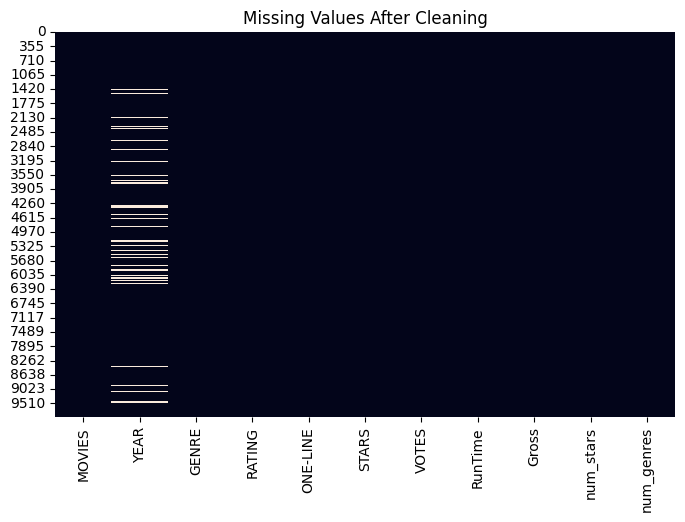

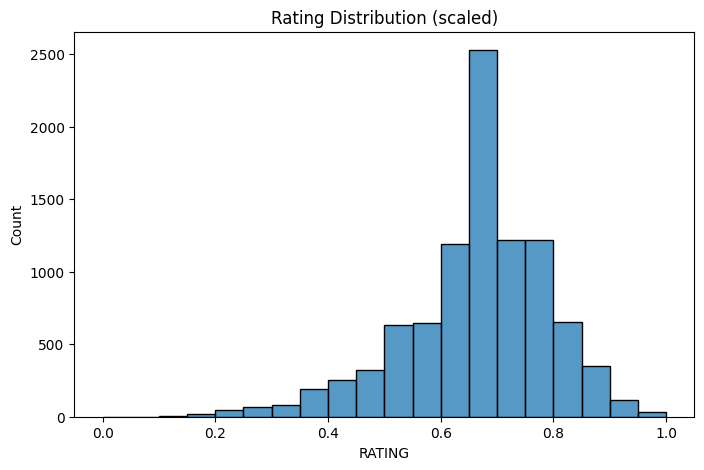

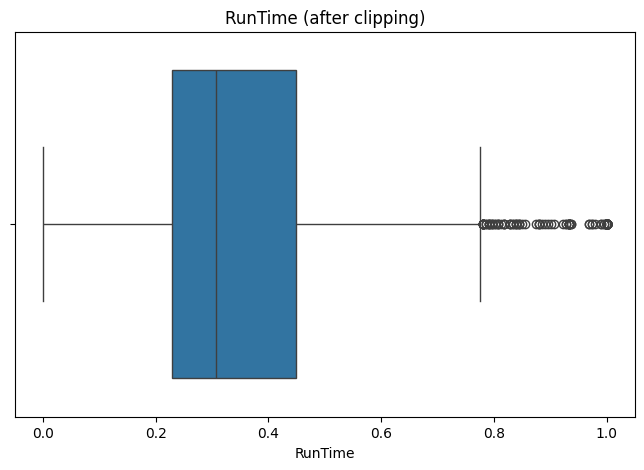

,MOVIES,YEAR,GENRE,RATING,ONE-LINE,STARS,VOTES,RunTime,Gross,num_stars,num_genres
0,Blood Red Sky,2021.0,"Action, Horror, Thriller",0.568182,A woman with a mysterious illness is forced in...,Director: Peter Thorwarth | Stars: Peri B...,0.012292,0.625033,0.0,4,3
1,Masters of the Universe: Revelation,2021.0,"Animation, Action, Adventure",0.443182,The war for Eternia begins again in what may b...,"Stars: Chris Wood, Sarah Michelle Gellar, Le...",0.010429,0.125007,0.0,4,3
2,The Walking Dead,2010.0,"Drama, Horror, Thriller",0.806818,Sheriff Deputy Rick Grimes wakes up from a com...,"Stars: Andrew Lincoln, Norman Reedus, Meliss...",0.517098,0.223970,0.0,4,3
3,Rick and Morty,2013.0,"Animation, Adventure, Comedy",0.920455,An animated series that follows the exploits o...,"Stars: Justin Roiland, Chris Parnell, Spence...",0.242171,0.114589,0.0,4,3
4,Army of Thieves,2021.0,"Action, Crime, Horror",0.681818,"A prequel, set before the events of Army of th...",Director: Matthias Schweighöfer | Stars: ...,0.000460,0.307308,0.0,4,3
5,Outer Banks,2020.0,"Action, Crime, Drama",0.738636,A group of teenagers from the wrong side of th...,"Stars: Chase Stokes, Madelyn Cline, Madison ...",0.015092,0.255222,0.0,4,3
6,The Last Letter from Your Lover,2021.0,"Drama, Romance",0.647727,A pair of interwoven stories set in the past a...,Director: Augustine Frizzell | Stars: Sha...,0.003081,0.567738,0.0,4,2
7,Dexter,2006.0,"Crime, Drama, Mystery",0.852273,"By day, mild-mannered Dexter is a blood-spatte...","Stars: Michael C. Hall, Jennifer Carpenter, ...",0.388426,0.270847,0.0,4,3
8,Never Have I Ever,2020.0,Comedy,0.772727,The complicated life of a modern-day first gen...,"Stars: Maitreyi Ramakrishnan, Poorna Jagannat...",0.020154,0.151050,0.0,4,1
9,Virgin River,2019.0,"Drama, Romance",0.715909,"Seeking a fresh start, nurse practitioner Meli...","Stars: Alexandra Breckenridge, Martin Henders...",0.015922,0.223970,0.0,4,2


In [16]:
# CELL 10 - visualizations (use these images in your slides or show live)
# Missing values heatmap (after cleaning)
sns.heatmap(df.isna(), cbar=False)
plt.title("Missing Values After Cleaning")
plt.show()

# Rating distribution
if 'RATING' in df.columns:
    sns.histplot(df['RATING'], bins=20)
    plt.title("Rating Distribution (scaled)")
    plt.show()

# RunTime boxplot
if 'RunTime' in df.columns:
    sns.boxplot(x=df['RunTime'])
    plt.title("RunTime (after clipping)")
    plt.show()

# Show a small sample of cleaned data
display(df.head(10))
